<a href="https://colab.research.google.com/github/HenriqueCCdA/Prophet/blob/main/notebook/saturating_forrecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fbprophet import Prophet
import pandas as pd

In [3]:
uri = 'https://raw.githubusercontent.com/HenriqueCCdA/Prophet/main/examples/example_wp_log_R.csv'

df = pd.read_csv(uri)

In [4]:
df.head()

ds         y
0  2008-01-30  5.976351
1  2008-01-16  6.049733
2  2008-01-17  6.011267
3  2008-01-14  5.953243
4  2008-01-15  5.910797

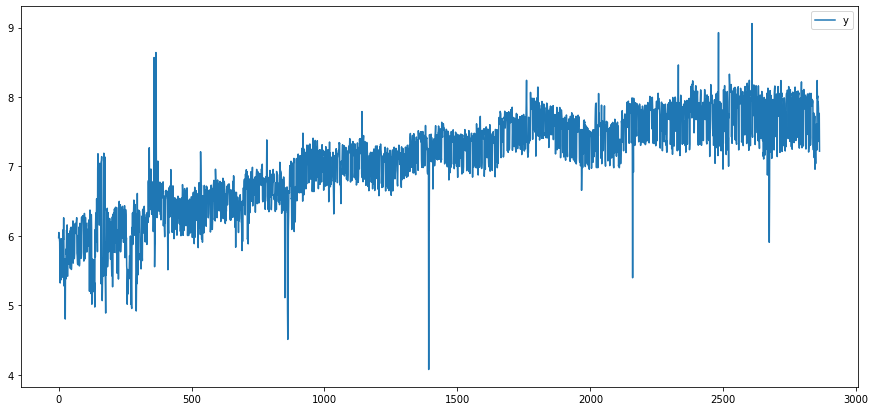

In [7]:
df.plot(figsize=(15,7))

In [24]:
df['cap'] = 8.5
df.head()

ds         y  cap
0  2008-01-30  5.976351  8.5
1  2008-01-16  6.049733  8.5
2  2008-01-17  6.011267  8.5
3  2008-01-14  5.953243  8.5
4  2008-01-15  5.910797  8.5

# Forecasting Growth

In [25]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=5000)
future['cap'] = 8.5
fcst = m.predict(future)

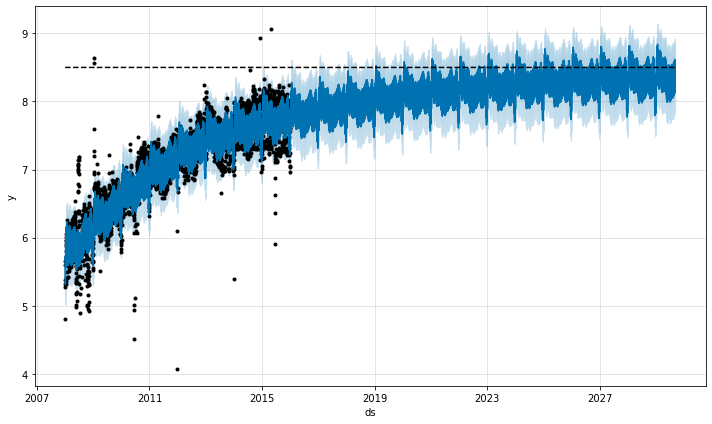

In [27]:
fig=m.plot(fcst)

# Saturating Minimum

In [29]:
df['y'] = 10 - df['y']

In [30]:
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5

In [31]:
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
fig = m.plot(fcst)